<a href="https://colab.research.google.com/github/damodhiran/Python-Mechanical-Engineers/blob/master/Otto_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thermal efficiency of the otto cycle = 62.989%


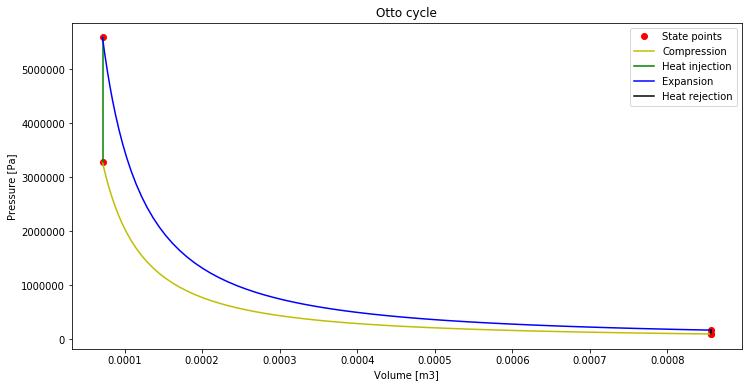

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def getVFromTheta(theta,R,v_c,cr):
    """
    Relation between V and theta
    v/v_c = 1+0.5*(cr-1)*(R+1-cos(theta)-(R^2 - (sin(theta))^2)^(0.5))
    """
    return v_c * (1+0.5*(cr-1)*(R+1-np.cos(theta)-(R**2 - np.sin(theta)**2)**0.5))

# Inputs
# Pressure
p1 = 101325
# Temperature
T1 = 500
T3 = 2300
gamma = 1.4

# Geometry
bore = 0.1
stroke = 0.1
con_rod = 0.15
cr = 12
# Crank pin radius
a = stroke/2
R = con_rod/a

# Volume calculation
# Stroke volume
v_s = np.pi/4 * pow(bore,2) * stroke
v_c = v_s/(cr-1)
v1 = v_c + v_s

# State point 2
v2 = v_c

# p2v2 ^ gamma = p1v1^gamma
p2 = (p1*pow(v1,gamma))/(pow(v2,gamma))

# Temperature
# p1v1/T1 = p2v2/T2
tmp = p1*v1/T1
T2 = p2*v2/tmp

theta = np.linspace(0,np.pi,100)
v_compression = getVFromTheta(theta,R,v_c,cr)

constant = p1*pow(v1,gamma)
p_compression = [constant/pow(v,gamma) for v in v_compression]


# State point 3
v3 =  v2
# p3v3/T3 = p2v2/T2
tmp = p2*v2/T2
p3 = tmp*T3/v3

# State point 4
v4 = v1

# p4v4^gamma = p3v4^gamma
p4 = p3*pow(v3,gamma)/pow(v4,gamma)

theta = np.linspace(np.pi,2*np.pi,100)
v_compression2 = getVFromTheta(theta,R,v_c,cr)

constant = p3*pow(v3,gamma)
p_compression2 = [constant/pow(v,gamma) for v in v_compression2]

# p4v4/T4 = p3v3/T3
tmp = p3*v3/T3
T4 = p4*v4/tmp

# Calculate thermal efficiency
# We can also use:
# eta_th = 1 - 1/(pow(cr,gamma-1))
eta_th = 1 - (T4-T1)/(T3-T2)
print("Thermal efficiency of the otto cycle = {:.3f}%".format(eta_th*100))

# Plot the otto cycle

plt.figure("Otto cyce",figsize=(12,6))
# Plot state points
plt.plot([v1,v2,v3,v4,v1],[p1,p2,p3,p4,p1],'o',c='r',label='State points')
# Plot from state 1 to 2
plt.plot(v_compression,p_compression,'-',c='y',label='Compression')
# Plot from state 2 to 3
plt.plot([v2,v3],[p2,p3],'-',c='g',label='Heat injection')
# Plot from state 3 to 4
plt.plot(v_compression2,p_compression2,'-',c='b',label='Expansion')
# Plot from state 4 to 1
plt.plot([v4,v1],[p4,p1],'-',c='k',label='Heat rejection')
plt.xlabel("Volume [m3]")
plt.ylabel("Pressure [Pa]")
plt.title("Otto cycle")
plt.legend(loc=1)
# Save figure
plt.savefig("Otto_cycle.png")